# Introduction

Dataset from https://www.kaggle.com/competitions/titanic/. Note that when referencing the 'test data', we do not mean the general usage of 'test data' as e.g. of estimating the real accuracy of the dataset, but the test data referenced here is data that contains every feature except for the label.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


Show the first five entries in the train dataset:

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Show the first five entries in the test dataset:

In [3]:
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


These are the values that we want to predict.

# General information of the dataset

Information about the features are found at https://www.kaggle.com/competitions/titanic/data.

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


General information:

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Number of missing values (NaN) per feature:

In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Data Analysis

For now, to get familiar with the dataset, we will get some information out of it.

How many people survived depending on the ticket class?

<AxesSubplot:xlabel='Pclass', ylabel='count'>

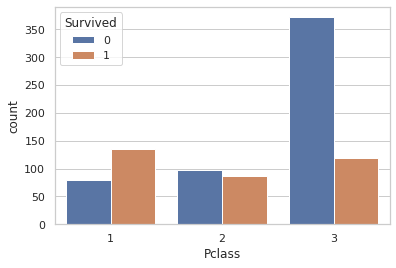

In [8]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

sns.countplot(data=train_data, x='Pclass', hue='Survived')

We can see that less people belonging to the 3rd ticket class did not survive. A reason can be that people having a higher ticket were prioritized during rescue.

How many male or female people survived?

<AxesSubplot:xlabel='Sex', ylabel='count'>

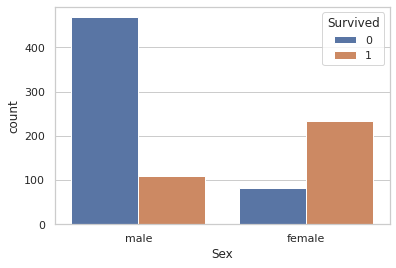

In [9]:
sns.countplot(data=train_data, x='Sex', hue='Survived')

More women survived than men! It makes sense because the focus during rescue was to get the women and children out of the Titanic first, and the men came last.

How many people survived depending age?

<AxesSubplot:xlabel='Age', ylabel='Count'>

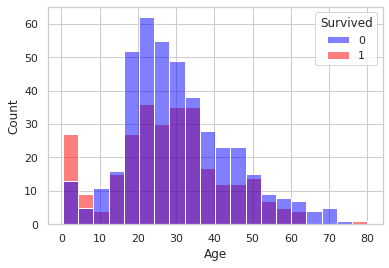

In [10]:
sns.histplot(data=train_data,x='Age', hue='Survived', palette=['blue','red'])

Seems like a lot more babies survived! See above for the reason (women and children were prioritized during rescue).

Now, we want to check the data for the incoming data preprocessing.

To get a general idea about the distribution of the data per feature, we will use boxplots.

<AxesSubplot:>

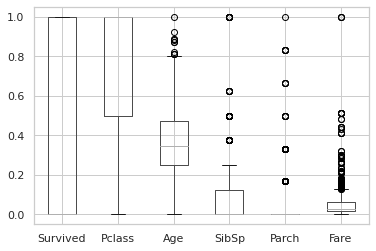

In [11]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
selected_features = ['Survived','Pclass','Age','SibSp','Parch','Fare']
minmax_train_data = MinMaxScaler().fit_transform(train_data[selected_features])
pd.DataFrame(minmax_train_data, columns=selected_features).boxplot()

A outlier that stands out, is at the 'Fare' feature (Fare = approx. 512) and should be removed.

In [12]:
max_fare_value = train_data['Fare'].max()
max_fare_value

512.3292

Removal of aforementioned outlier:

In [13]:
index_with_max_fare_to_drop = train_data['Fare'].idxmax()
# to get the respective row: train_data.iloc[index_with_max_fare_to_drop]
print(train_data.iloc[index_with_max_fare_to_drop])
train_data.drop(index_with_max_fare_to_drop, inplace=True)

PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Sex                      female
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                   512.3292
Cabin                       NaN
Embarked                      C
Name: 258, dtype: object


# Convert categorial data to integers

In [14]:
def convert_categorial_data_to_int(df: pd.DataFrame):
    df['Sex'].replace(['female','male'], [0,1], inplace=True)
    df['Embarked'].replace(['C','Q','S'], [0,1,2], inplace=True)
    
convert_categorial_data_to_int(train_data)
convert_categorial_data_to_int(test_data)

# Drop irrelevant columns

These are: PassengerId, Name, Ticket.

Drop Cabin as well due to too many missing values:

In [15]:
irrelevant_columns = ['PassengerId','Name','Ticket','Cabin']
train_data.drop(columns=irrelevant_columns, inplace=True)
test_data.drop(columns=irrelevant_columns, inplace=True)

In [16]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0


# Correlation Matrix

Check for collinearity because we may want to drop more features if collinearity was found. (Less features are better in the end when building the model.)

In [17]:
corr = train_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.337020,-0.542471,-0.077928,-0.034683,0.082388,0.257668,-0.167449
Pclass,-0.337020,1.000000,0.129828,-0.369069,0.082370,0.017636,-0.563637,0.161815
Sex,-0.542471,0.129828,1.000000,0.094052,-0.115487,-0.246496,-0.177351,0.107690
Age,-0.077928,-0.369069,0.094052,1.000000,-0.308059,-0.188912,0.097178,-0.031595
SibSp,-0.034683,0.082370,-0.115487,-0.308059,1.000000,0.414690,0.174227,0.068015
Parch,0.082388,0.017636,-0.246496,-0.188912,0.414690,1.000000,0.234025,0.039501
Fare,0.257668,-0.563637,-0.177351,0.097178,0.174227,0.234025,1.000000,-0.217390
Embarked,-0.167449,0.161815,0.107690,-0.031595,0.068015,0.039501,-0.217390,1.000000


Doesn't seem like there is a very significant collinearity to be found!

# Check on "Fare"

Especially because it contains a NaN value in the test dataset.

Check the histogram for the 'Fare' feature. Depending on the distribution, we will decide how to deal with NaN values found in this feature.

<AxesSubplot:xlabel='Fare', ylabel='Count'>

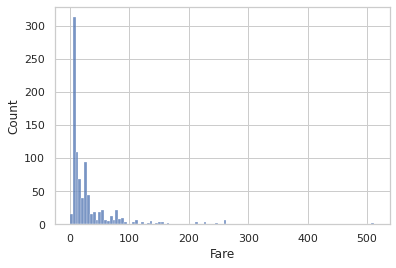

In [18]:
sns.histplot(data=train_data, x='Fare')

It should suffice to take the mean as it is only one observation, and an outlier in the training data was removed!
Note that as we deal with test data, we should not make any assumptions about the test data. Therefore we take the mean of the train data.

In [19]:
train_data['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 890, dtype: float64

In [20]:
from sklearn.impute import SimpleImputer
mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
mean_imp.fit(train_data['Fare'].to_numpy().reshape(-1,1))
test_data.loc[:,'Fare'] = mean_imp.transform(test_data['Fare'].to_numpy().reshape(-1,1))

# Fill NaN values in "Age"

To fill the NaN values for 'Age', we will use linear regression with highly correlated features to use these generated values as a replacement instead.

<AxesSubplot:ylabel='Count'>

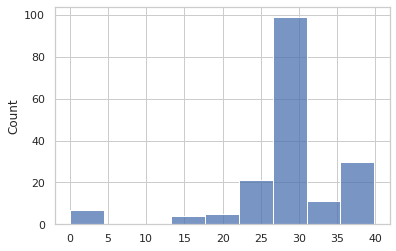

In [21]:
from sklearn.linear_model import LinearRegression
# use features with high correlation
age_regression_features = ['Pclass','SibSp','Parch']
lr = LinearRegression()
train_age_nan_df = train_data[train_data['Age'].isnull() == True]
train_age_no_nan_df = train_data[train_data['Age'].isnull() == False]
lr.fit(train_age_no_nan_df[age_regression_features],train_age_no_nan_df['Age'])
age_pred = lr.predict(train_age_nan_df[age_regression_features])
age_pred = age_pred.clip(min=0) # people cannot be younger than 0 years old
sns.histplot(data=age_pred)

In [22]:
indices = train_data[train_data['Age'].isnull() == True].index
train_data.loc[indices,['Age']] = age_pred

In [23]:
# perform on the test data
test_age_nan_df = test_data[test_data['Age'].isnull() == True]
test_age_pred = lr.predict(test_age_nan_df[age_regression_features])
indices = test_data[test_data['Age'].isnull() == True].index
test_data.loc[indices,['Age']] = test_age_pred

# Deal with "Embarked" Feature

Last, we have to tackle NaN values in the 'Embarked' feature.

In [24]:
print("Number of NaNs in 'Embarked' column: ", train_data.loc[train_data['Embarked'].isnull() == True,['Embarked']].shape[0])

Number of NaNs in 'Embarked' column:  2


2 values are not that many compared to the hundreds of samples in the train dataset. A simple imputation method should suffice.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

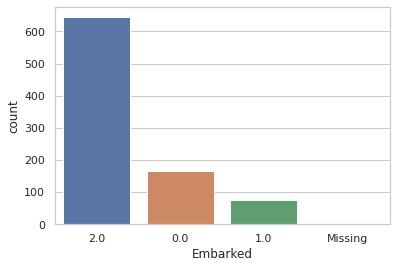

In [25]:
sns.countplot(data=train_data.fillna('Missing'), x='Embarked')

In [26]:
print("Percentage of 'Embarked' having the value 2 in train_data: ", train_data.loc[train_data['Embarked'] == 2,['Embarked']].shape[0] / train_data.shape[0])

Percentage of 'Embarked' having the value 2 in train_data:  0.7235955056179775


Taking the correlation matrix as well has the very high count of value 2 as the mode by a big margin, we can substitute the missing values with the mode (value = 2).

In [27]:
embarked_mode = train_data.mode()['Embarked'][0]
train_data.loc[:,'Embarked'].fillna(embarked_mode, inplace=True)
test_data.loc[:,'Embarked'].fillna(embarked_mode, inplace=True)

In [28]:
train_data.loc[:,'Embarked'].fillna(train_data.mode()['Embarked'][0])

0      2.0
1      0.0
2      2.0
3      2.0
4      2.0
      ... 
886    2.0
887    2.0
888    2.0
889    0.0
890    1.0
Name: Embarked, Length: 890, dtype: float64

# Correct data types

Finally, we make a final check on the datatypes as they might be incorrect after filling in the NaN values.

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 890 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    int64  
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    int64  
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 94.9 KB


Only the 'Embarked' feature has the wrong datatype. As 'Embarked' uses nominal values, its values should be integers (especially when using models that cannot deal with categorial data).

In [30]:
train_data.loc[:,'Embarked'] = train_data.loc[:,'Embarked'].astype(np.int64)
test_data.loc[:,'Embarked'] = test_data.loc[:,'Embarked'].astype(np.int64)

We are now done with the data preprocessing. Now onto the model building!

## Model building

Some needed methods:

Scale data to [0,1]:

In [31]:
# add a version with scaled values for classifier that only work with scaled data + use dummy variables
def create_scaled_X(df: pd.DataFrame):
    df_scaled = pd.get_dummies(df, columns=['Pclass','Embarked']).drop(['Pclass_3', 'Embarked_2'], axis=1)
    df_np_scaled = MinMaxScaler().fit_transform(df_scaled)
    df_scaled.iloc[:] = df_np_scaled
    return df_scaled

Scaling is definitely needed for distance-based algorithms like kNN.

Method for Cross-Validation:

In [32]:
def perform_cv(classifier, X, y, cv=10):  # here CV is performed multiple times for lower variance of accuracy
    num_times_to_perform_cv = 3 # we should get a better representation of the real accuracy my trying out different CV splits
    cv_scores = np.array([cross_validate(classifier, X, y, cv=cv)['test_score'] for _ in range(num_times_to_perform_cv)]).flatten()
    return cv_scores.mean(), cv_scores.std()

For a first estimate, we will take a simple random forest classifier to get a general idea how good an unoptimized model can be.

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

X = train_data.drop(['Survived'],axis=1) # drop columns
y = train_data['Survived']

X_scaled = create_scaled_X(X)

classifier = RandomForestClassifier(n_estimators=200, max_depth=4)
classifier.fit(X,y)

cv_performance = perform_cv(classifier, X, y, cv=10)
cv_score = cv_performance[0]
cv_score_std = cv_performance[1]
print("Unscaled Data:\t Score (Mean): \t\t %.2f" % cv_score)
print("Unscaled Data:\t Standard Deviation: \t %.2f" % cv_score_std)

classifier_scaled = RandomForestClassifier(n_estimators=200, max_depth=4)
classifier_scaled.fit(X_scaled,y)

cv_performance = perform_cv(classifier, X_scaled, y, cv=10)
cv_score = cv_performance[0]
cv_score_std = cv_performance[1]
print("Scaled Data:\t Score (Mean): \t\t %.2f" % cv_score)
print("Scaled Data:\t Standard Deviation: \t %.2f" % cv_score_std)

Unscaled Data:	 Score (Mean): 		 0.82
Unscaled Data:	 Standard Deviation: 	 0.04
Scaled Data:	 Score (Mean): 		 0.81
Scaled Data:	 Standard Deviation: 	 0.03


That means that the accuracy obtained by cross-validation is somewhere around 78-86% (unscaled data) and 78-84% (scaled data).

We will use the fact that random forest are able to find important features. In the following plot, there are to graphs: the bar plot how the relative value of the importance of each feature, and the line plot shows the cumulative version.

<AxesSubplot:xlabel='feature', ylabel='importance'>

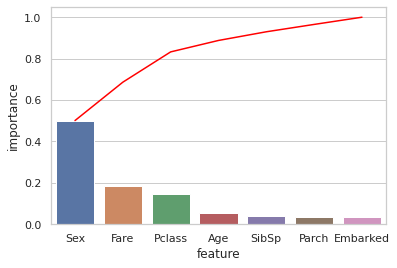

In [34]:
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=3)
rf_classifier.fit(X,y)

feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': rf_classifier.feature_importances_})

feature_order = feature_importance_df.sort_values('importance', ascending=False).feature

sns.lineplot(x=feature_importance_df['feature'], y=feature_importance_df.set_index('feature').loc[feature_order].reset_index().loc[:,'importance'].cumsum(), color='red')
sns.barplot(data=feature_importance_df, x='feature', y='importance', order=feature_importance_df.sort_values('importance', ascending=False).feature)

Judging from this plot, we can see that 'Embarked' and 'Parch' are not that important. Because the dataset is small enough, we can use modified training datasets that have 'Parch'/'Embarked' & 'Parch' removed.

In [35]:
# X2: 'Parch' removed
X2 = train_data.drop(['Survived','Parch'],axis=1) # drop columns
classifier2 = RandomForestClassifier(n_estimators=200, max_depth=4)
classifier2.fit(X2,y)

cv_performance2 = perform_cv(classifier2, X2, y, cv=10)
cv_score2 = cv_performance2[0]
cv_score_std2 = cv_performance2[1]
print("Unscaled Data:\t Score (Mean): \t\t %0.2f" % cv_score2)
print("Unscaled Data:\t Standard Deviation: \t %0.2f" % cv_score_std2)

# X3: 'Parch' and 'Embarked' removed
X3 = train_data.drop(['Survived','Parch','Embarked'],axis=1) # drop columns
classifier3 = RandomForestClassifier(n_estimators=200, max_depth=4)
classifier3.fit(X3,y)

cv_performance3 = perform_cv(classifier3, X3, y, cv=10)
cv_score3 = cv_performance3[0]
cv_score_std3 = cv_performance3[1]
print("Unscaled Data:\t Score (Mean): \t\t %0.2f" % cv_score3)
print("Unscaled Data:\t Standard Deviation: \t %0.2f" % cv_score_std3)

Unscaled Data:	 Score (Mean): 		 0.82
Unscaled Data:	 Standard Deviation: 	 0.04
Unscaled Data:	 Score (Mean): 		 0.82
Unscaled Data:	 Standard Deviation: 	 0.04


Now we will use some different types of classifiers that we will check:
- Naive Bayes
- k-Nearest Neighbors
- Decision Tree
- Random Forest
- Logistic Regression

We will use a grid search to find the optimal hyperparamters + classifier.

In [36]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

nb_classifier = GaussianNB()
knn_classifier = KNeighborsClassifier()
dt_classifier = tree.DecisionTreeClassifier(random_state = 12)
rf_classifier = RandomForestClassifier(random_state = 12)
logr_classifier = LogisticRegression()

On all features:

In [37]:
from sklearn.model_selection import GridSearchCV

# Naive Bayes does not have any (interesting) hyperparameters

nb_parm_grid = {}

knn_param_grid = {
    'n_neighbors': [1,3,5,7,9,13,17,25,31],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

dt_param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [9,15,21,27,35,42],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

rf_param_grid = {
    'n_estimators': [300,400,600],
    'criterion': ['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [3,9,15],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

logr_param_grid = {
    'penalty': ['none','l2', 'l1', 'elasticnet'],
    'C': [0.1,0.2,0.5,1.0,1.5,2.0,5.0]
}

clf_nb = GridSearchCV(nb_classifier, param_grid=nb_parm_grid, cv=5, verbose=True, n_jobs=-1)
clf_knn = GridSearchCV(knn_classifier, param_grid=knn_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_dt = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_rf = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_logr = GridSearchCV(logr_classifier, param_grid=logr_param_grid, cv=5, verbose=True, n_jobs=-1)

best_clf_nb = clf_nb.fit(X,y)
print("NB Score: ", best_clf_nb.best_score_)
print("NB Parameter: ", best_clf_nb.best_params_)
best_clf_knn = clf_knn.fit(X_scaled,y)
print("KNN Score: ", best_clf_knn.best_score_)
print("KNN Parameter: ", best_clf_knn.best_params_)
best_clf_dt = clf_dt.fit(X,y)
print("DT Score: ", best_clf_dt.best_score_)
print("DT Parameter: ", best_clf_dt.best_params_)
best_clf_rf = clf_rf.fit(X,y)
print("RF Score: ", best_clf_rf.best_score_)
print("RF Parameter: ", best_clf_rf.best_params_)
best_clf_logr = clf_logr.fit(X,y)
print("LogR Score: ", best_clf_logr.best_score_)
print("LogR Parameter: ", best_clf_logr.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
NB Score:  0.7876404494382023
NB Parameter:  {}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
KNN Score:  0.8044943820224718
KNN Parameter:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
DT Score:  0.8202247191011235
DT Parameter:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
RF Score:  0.842696629213483
RF Parameter:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Fitting 5 folds for each of 28 candidates, totalling 140 fits
LogR Score:  0.8033707865168539
LogR Parameter:  {'C': 0.5, 'penalty': 'l2'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

```
RF Score:  0.842696629213483

RF Parameter:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
```

On all features except 'Parch':

In [38]:
from sklearn.model_selection import GridSearchCV

# Naive Bayes does not have any (interesting) hyperparameters

nb_parm_grid = {}

knn_param_grid = {
    'n_neighbors': [1,3,5,7,9,13,17,25,31],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

dt_param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [9,15,21,27,35,42],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

rf_param_grid = {
    'n_estimators': [300,400,600],
    'criterion': ['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [3,9,15],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

logr_param_grid = {
    'penalty': ['none','l2', 'l1', 'elasticnet'],
    'C': [0.1,0.2,0.5,1.0,1.5,2.0,5.0]
}

clf_nb = GridSearchCV(nb_classifier, param_grid=nb_parm_grid, cv=5, verbose=True, n_jobs=-1)
clf_knn = GridSearchCV(knn_classifier, param_grid=knn_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_dt = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_rf = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_logr = GridSearchCV(logr_classifier, param_grid=logr_param_grid, cv=5, verbose=True, n_jobs=-1)

best_clf_nb = clf_nb.fit(X2,y)
print("NB Score: ", best_clf_nb.best_score_)
print("NB Parameter: ", best_clf_nb.best_params_)
best_clf_knn = clf_knn.fit(X_scaled,y)
print("KNN Score: ", best_clf_knn.best_score_)
print("KNN Parameter: ", best_clf_knn.best_params_)
best_clf_dt = clf_dt.fit(X2,y)
print("DT Score: ", best_clf_dt.best_score_)
print("DT Parameter: ", best_clf_dt.best_params_)
best_clf_rf = clf_rf.fit(X2,y)
print("RF Score: ", best_clf_rf.best_score_)
print("RF Parameter: ", best_clf_rf.best_params_)
best_clf_logr = clf_logr.fit(X2,y)
print("LogR Score: ", best_clf_logr.best_score_)
print("LogR Parameter: ", best_clf_logr.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
NB Score:  0.7865168539325843
NB Parameter:  {}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
KNN Score:  0.8044943820224718
KNN Parameter:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
DT Score:  0.8235955056179775
DT Parameter:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
RF Score:  0.8404494382022472
RF Parameter:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 28 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python

LogR Score:  0.80561797752809
LogR Parameter:  {'C': 0.2, 'penalty': 'l2'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

```
RF Score:  0.8404494382022472

RF Parameter:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 9, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
```

On all features except 'Parch' and 'Embarked':

In [39]:
from sklearn.model_selection import GridSearchCV

# Naive Bayes does not have any (interesting) hyperparameters

nb_parm_grid = {}

knn_param_grid = {
    'n_neighbors': [1,3,5,7,9,13,17,25,31],
    'weights': ['uniform','distance'],
    'p': [1,2]
}

dt_param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [9,15,21,27,35,42],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

rf_param_grid = {
    'n_estimators': [300,400,600],
    'criterion': ['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [3,9,15],
    'max_features': ['sqrt','log2',3,None],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4]
}

logr_param_grid = {
    'penalty': ['none','l2', 'l1', 'elasticnet'],
    'C': [0.1,0.2,0.5,1.0,1.5,2.0,5.0]
}

clf_nb = GridSearchCV(nb_classifier, param_grid=nb_parm_grid, cv=5, verbose=True, n_jobs=-1)
clf_knn = GridSearchCV(knn_classifier, param_grid=knn_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_dt = GridSearchCV(dt_classifier, param_grid=dt_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_rf = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5, verbose=True, n_jobs=-1)
clf_logr = GridSearchCV(logr_classifier, param_grid=logr_param_grid, cv=5, verbose=True, n_jobs=-1)

best_clf_nb = clf_nb.fit(X3,y)
print("NB Score: ", best_clf_nb.best_score_)
print("NB Parameter: ", best_clf_nb.best_params_)
best_clf_knn = clf_knn.fit(X_scaled,y)
print("KNN Score: ", best_clf_knn.best_score_)
print("KNN Parameter: ", best_clf_knn.best_params_)
best_clf_dt = clf_dt.fit(X3,y)
print("DT Score: ", best_clf_dt.best_score_)
print("DT Parameter: ", best_clf_dt.best_params_)
best_clf_rf = clf_rf.fit(X3,y)
print("RF Score: ", best_clf_rf.best_score_)
print("RF Parameter: ", best_clf_rf.best_params_)
best_clf_logr = clf_logr.fit(X3,y)
print("LogR Score: ", best_clf_logr.best_score_)
print("LogR Parameter: ", best_clf_logr.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
NB Score:  0.7831460674157305
NB Parameter:  {}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
KNN Score:  0.8044943820224718
KNN Parameter:  {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Fitting 5 folds for each of 432 candidates, totalling 2160 fits
DT Score:  0.8269662921348315
DT Parameter:  {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
RF Score:  0.8359550561797752
RF Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
Fitting 5 folds for each of 28 candidates, totalling 140 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python

LogR Score:  0.8089887640449438
LogR Parameter:  {'C': 0.2, 'penalty': 'l2'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solve

```
RF Score:  0.8359550561797752

RF Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
```

Taking a look of all the results: We could take all features due to having the highest accuracy. However, if we only leave out 'Parch', we only get a 0.2% decrease in accuracy. Therefore, for a less complex model, faster training time and less chances to overfit, we will take the train dataset with 'Parch' removed.

Now we set more possible parameters with the that dataset, to fine-tune our model with the optimal hyperparameters.

In [40]:
X = X2

rf_param_grid = {
    'n_estimators': [50,100,150,250,300],
    'criterion': ['gini','entropy'],
    'bootstrap': [True],
    'max_depth': [4,5,6,7,8,9,10,11,12,13,14],
    'max_features': ['sqrt'],
    'min_samples_leaf': [1,2],
    'min_samples_split': [2,3,4]
}

clf_rf = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=10, verbose=True, n_jobs=-1)

best_clf_rf = clf_rf.fit(X,y)
print("RF Score: ", best_clf_rf.best_score_)
print("RF Parameter: ", best_clf_rf.best_params_)

clf_rf2 = GridSearchCV(rf_classifier, param_grid=rf_param_grid, cv=5, verbose=True, n_jobs=-1)

best_clf_rf2 = clf_rf.fit(X,y)
print("RF Score: ", best_clf_rf2.best_score_)
print("RF Parameter: ", best_clf_rf2.best_params_)

Fitting 10 folds for each of 660 candidates, totalling 6600 fits
RF Score:  0.8471910112359551
RF Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 10 folds for each of 660 candidates, totalling 6600 fits
RF Score:  0.8471910112359551
RF Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


```
CV, k=10:

RF Score:  0.8471910112359551

RF Parameter:  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
```
Pretty weird that it recommends the random forest classifier with the lowest amount of estimators, as the accuracy should improve with more estimators...
```
CV, k=5:

RF Score:  0.8348314606741573

RF Parameter:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
```

The hyperparamters above will be used for our final classifier.

In [41]:
final_classifier = RandomForestClassifier(bootstrap=True,
                                          criterion='gini',
                                          max_depth=12,
                                          max_features='sqrt',
                                          min_samples_leaf=1,
                                          min_samples_split=4,
                                          n_estimators=100)

final_classifier.fit(X,y)
prediction = final_classifier.predict(X)

Now we will check the quality of our model.

Confusion Matrix:

<AxesSubplot:>

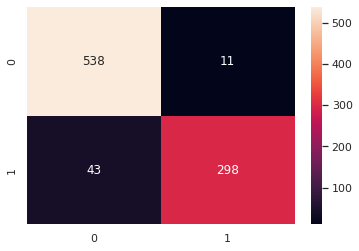

In [42]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y, prediction),annot=True, fmt='g')

Quite some False Negatives (predicted "survive"d, but actually did "not survive"), but still a decent model. We assume that the cost for both False Positives and False Negatives are the same. If it were not the case, e.g. if we would use the model to determine passengers that went missing and we did not know if they survived, to inform family members of missing passengers, then this model would not be great because of the high number of False Negatives (also compared to the False Positives) and getting their hopes up for a potential survival case.

Precision, Recall, F1-score:

Precision: 	 0.964
Recall: 	 0.874
F-score: 	 0.917


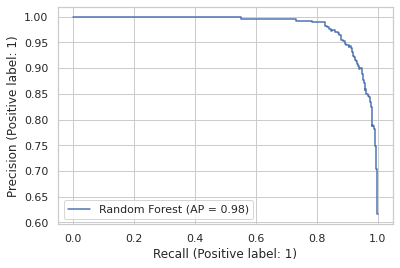

In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision: \t %0.3f" % precision_score(y, prediction))
print("Recall: \t %0.3f" % recall_score(y, prediction))
print("F-score: \t %0.3f" % f1_score(y, prediction))

from sklearn.metrics import PrecisionRecallDisplay
display = PrecisionRecallDisplay.from_estimator(
    final_classifier, X, y, name="Random Forest"
)

Similar to the accuracy, these values (~0.8) are good. (1 is best)

ROC AUC:

ROC AUC score: 	 0.927


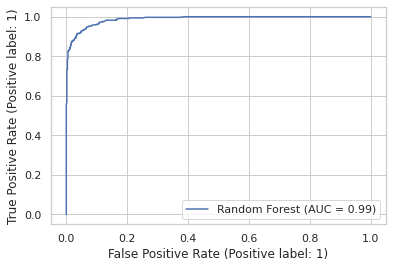

In [44]:
from sklearn.metrics import auc, roc_curve, RocCurveDisplay, roc_auc_score

print("ROC AUC score: \t %0.3f" % roc_auc_score(y, prediction))
fpr, tpr, thresholds = roc_curve(y, prediction)
roc_auc = auc(fpr, tpr)

RocCurveDisplay.from_estimator(final_classifier, X, y, name="Random Forest")

This curve looks very nice, with the ROC AUC score being >90%, seems like the predictions produced by the model are very good when using different threshold settings.

# Predictions (Kaggle competition)

The prediction for our test data (Kaggle competition-related):

In [45]:
X_test = test_data.drop(['Parch'],axis=1)

pred = final_classifier.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
submission_data = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission_data.loc[:,'Survived'] = pred
submission_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [47]:
submission_data.to_csv('my_submission.csv', index=False)